In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet  
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score,silhouette_score,euclidean_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
plt.rcParams['figure.figsize']=[16,10]
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### 	Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

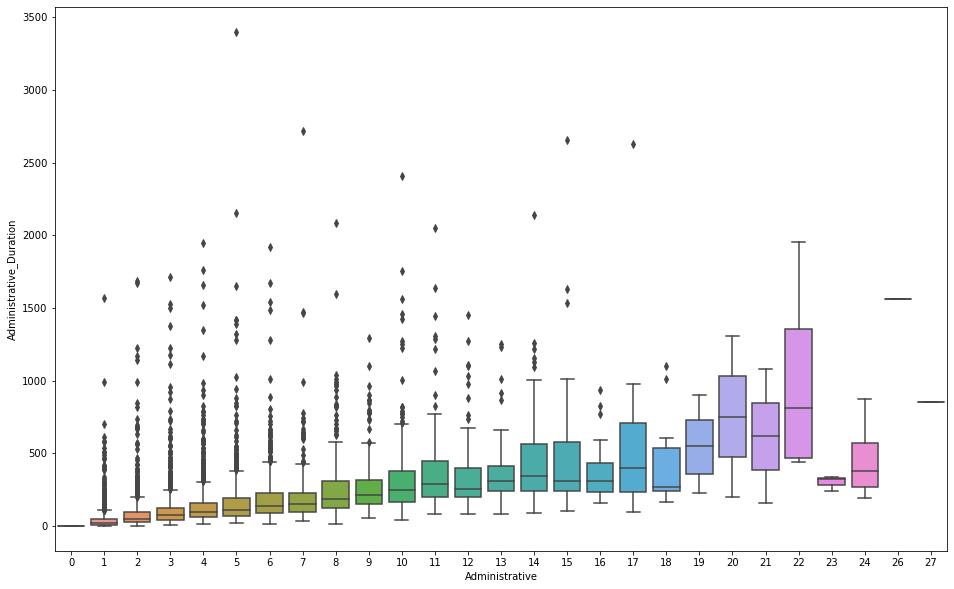

In [6]:
sb.boxplot(x=df.Administrative,y=df.Administrative_Duration)

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

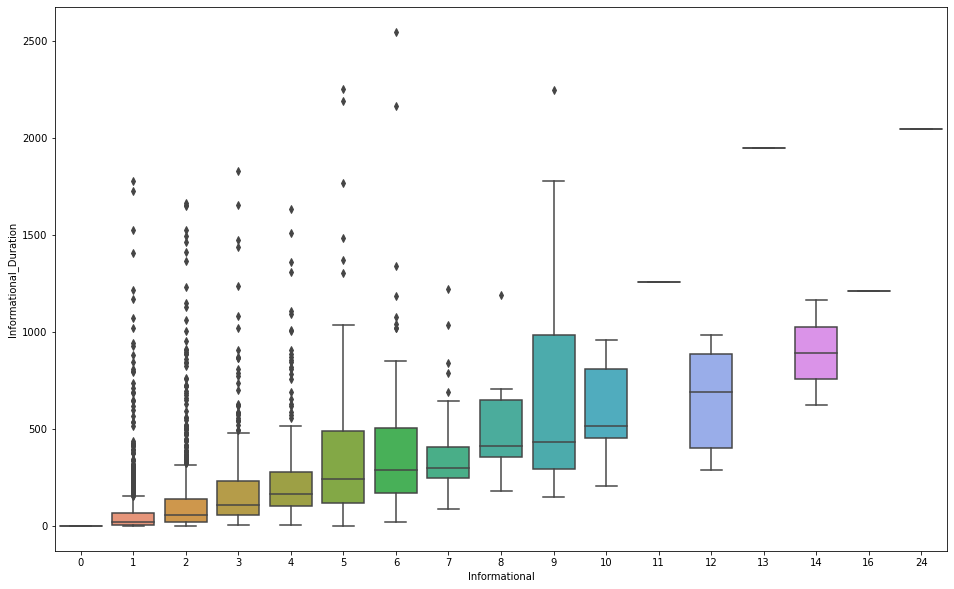

In [7]:
sb.boxplot(x=df.Informational,y=df.Informational_Duration)

In [8]:
df.ProductRelated.value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

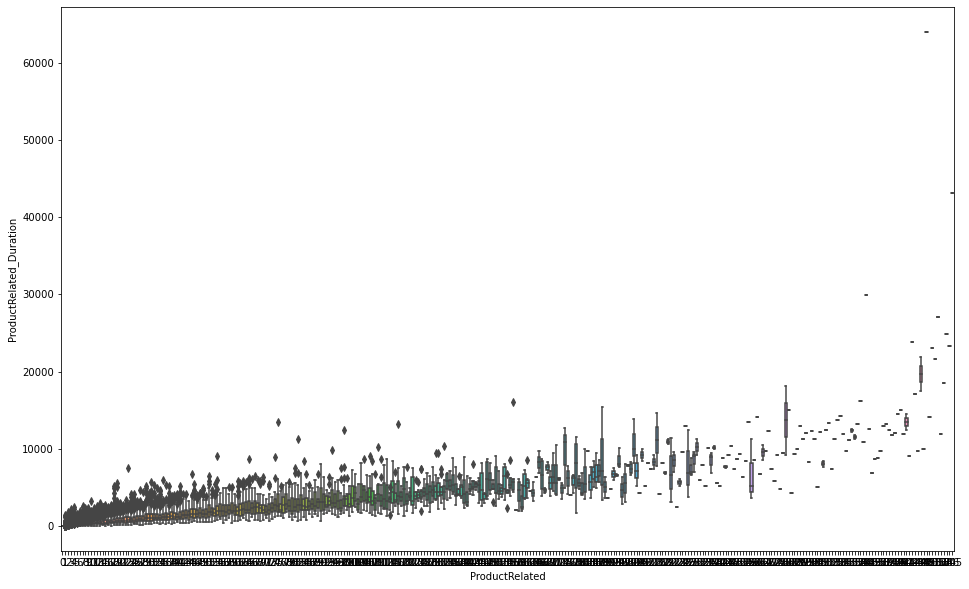

In [9]:
sb.boxplot(x=df.ProductRelated,y=df.ProductRelated_Duration)

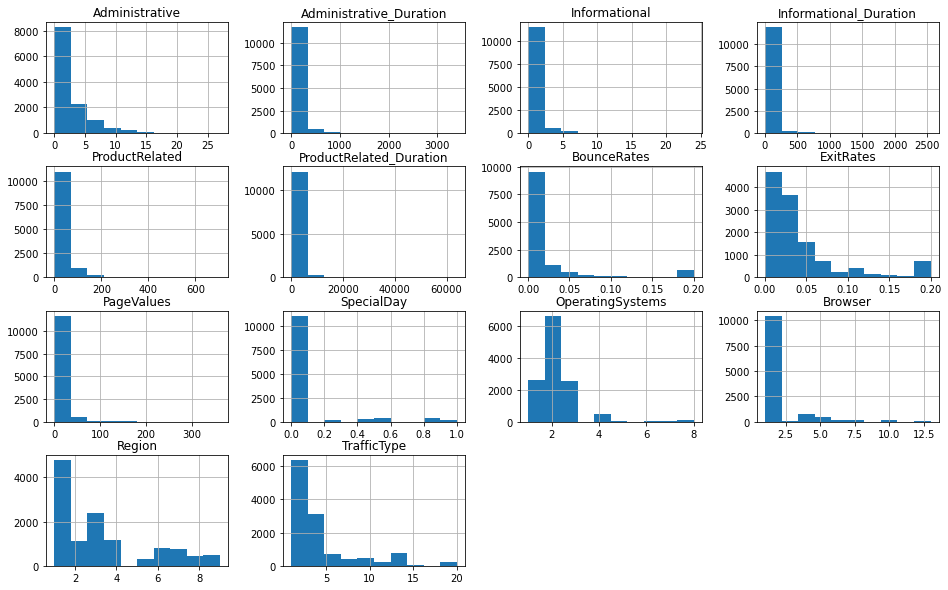

In [10]:
df.hist()
plt.show()

In [11]:
df.Month.replace({'June':'Jun'},inplace=True)

In [12]:
df.Month.value_counts()

May    3364
Nov    2998
Mar    1907
Dec    1727
Oct     549
Sep     448
Aug     433
Jul     432
Jun     288
Feb     184
Name: Month, dtype: int64

In [13]:
df.Month=pd.to_datetime(df.Month,format='%b').dt.month

In [14]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,Returning_Visitor,False,False


### 	Perform required encoding techniques

In [15]:
le=LabelEncoder()
df.VisitorType=le.fit_transform(df.VisitorType)
df.Weekend=le.fit_transform(df.Weekend)
df.Revenue=le.fit_transform(df.Revenue)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [17]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

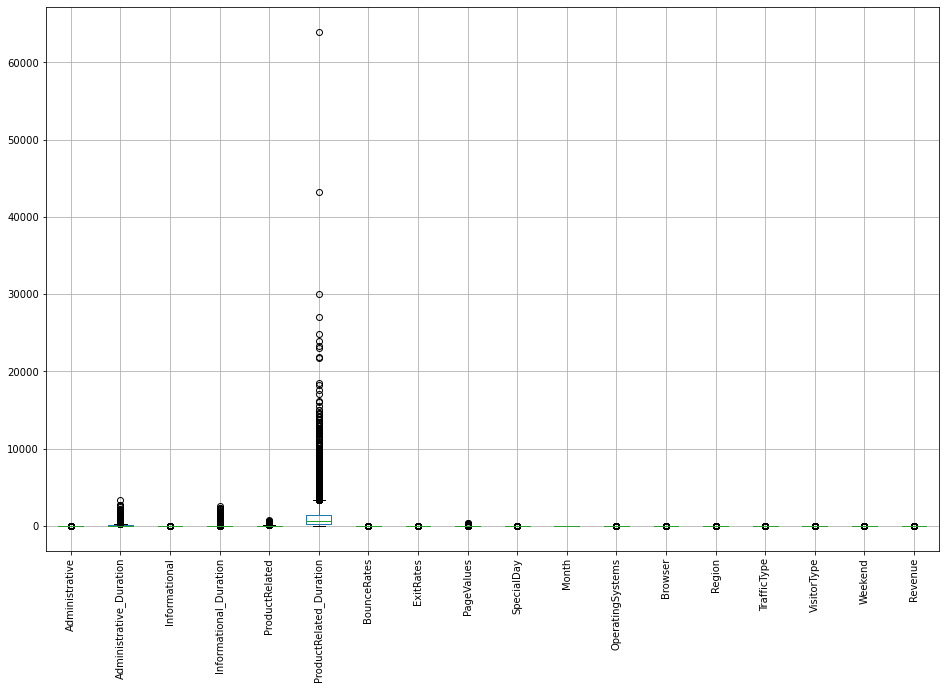

In [18]:
df.boxplot()
plt.xticks(rotation=90);

### 	Perform Outlier treatment 

In [19]:
q1=df.quantile(.25)
q3=df.quantile(.75)
mn=q1-1.5*(q3-q1)
mx=q3+2.5*(q3-q1)
dff=df[(df>mx).any(axis=1)]

In [20]:
dff.Revenue.value_counts()

0    7391
1    1908
Name: Revenue, dtype: int64

In [27]:
# removing outliers removes a class and makes it monotonous
# so proceeding without outliers

### 	Perform appropriate scaling

In [21]:
y=df.Revenue
x=df.drop('Revenue',axis=1)

In [22]:
ss=StandardScaler()
sx=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [26]:
elb=[]
sil=[]
for i in range(2,15):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(sx)
    elb.append(km.inertia_)
    sil.append(silhouette_score(sx,km.predict(sx)))

<AxesSubplot:>

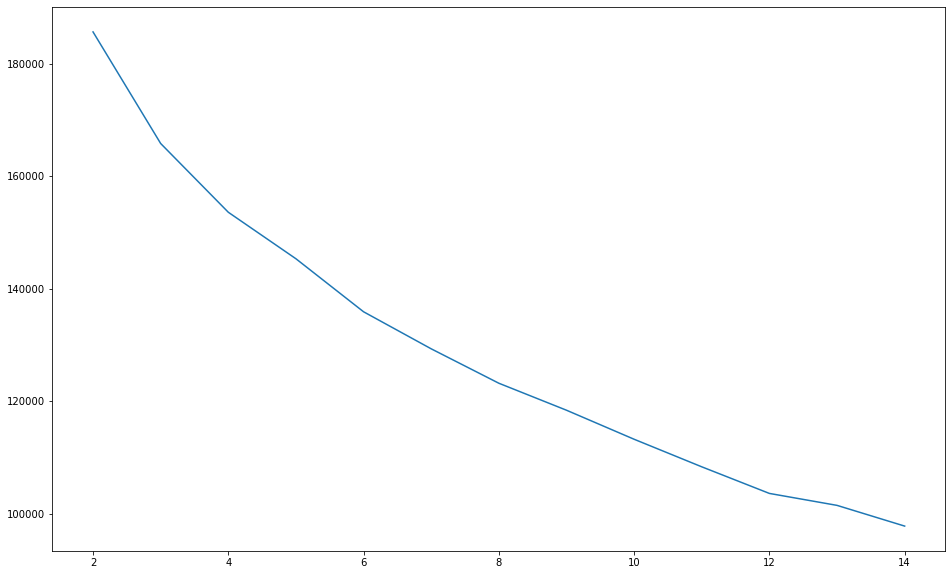

In [27]:
sb.lineplot(x=range(2,15),y=elb)

<AxesSubplot:>

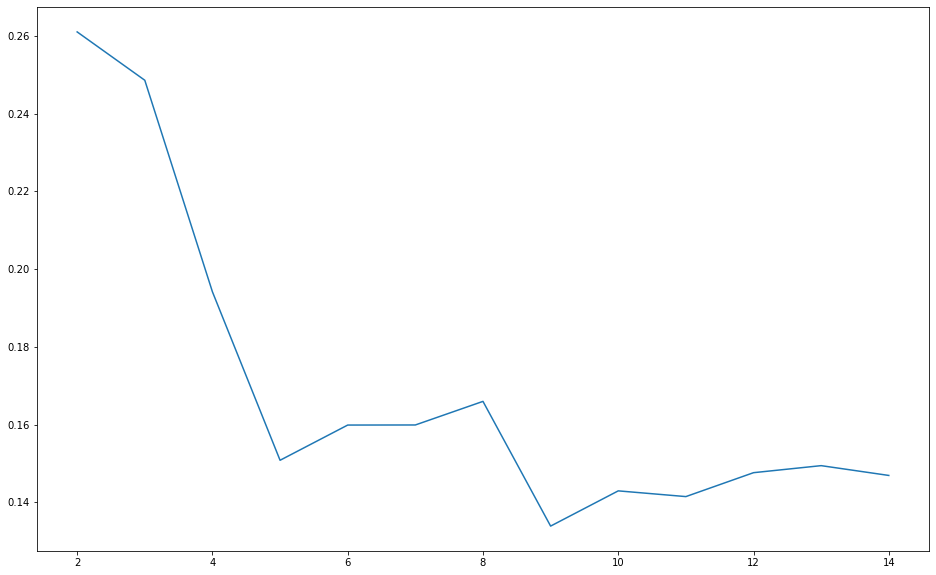

In [32]:
sb.lineplot(x=range(2,15),y=sil)

### Build the different cluster models

In [28]:
km=KMeans(n_clusters=2,random_state=1)
km.fit(sx)
accuracy_score(y,km.labels_)

0.7759935117599351

In [29]:
y=dff.Revenue
x=dff.drop('Revenue',axis=1)

In [30]:
ss=StandardScaler()
sx=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

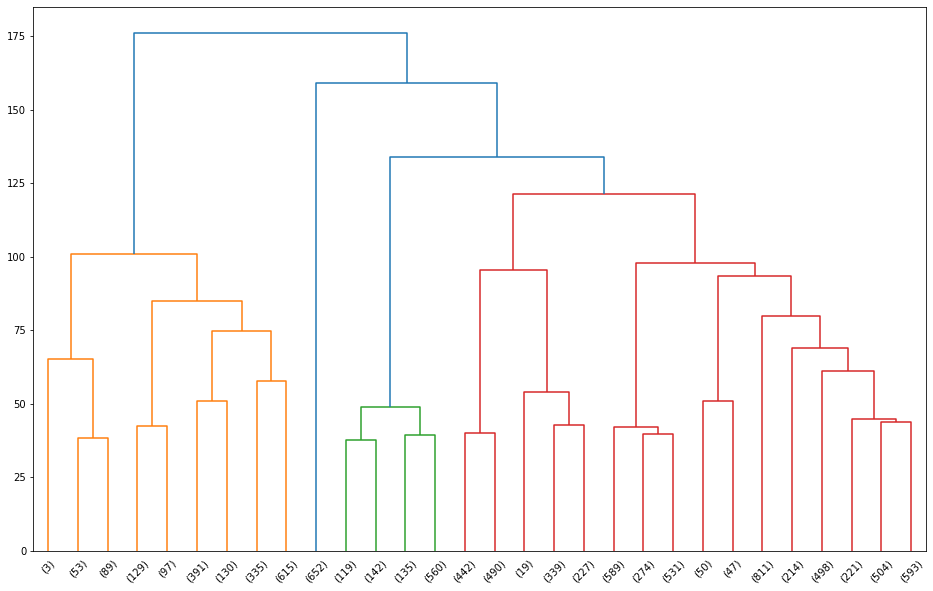

In [31]:
lk=linkage(sx,'ward')
dendrogram(lk,truncate_mode='lastp')
plt.show()

### 	Analyse the optimum number of cluster using appropriate techniques.

In [32]:
agc=AgglomerativeClustering(n_clusters=2,linkage='ward')
agc.fit(sx)
accuracy_score(y,agc.labels_)

0.7038391224862889

In [33]:
silhouette_score(sx,agc.fit_predict(sx))

0.17150396931561465

In [34]:
dist_array = euclidean_distances(sx)[np.triu_indices(len(sx), k = 1)]
dist_array.min(),dist_array.max()

(0.0, 43.69225565723757)

In [35]:
db=DBSCAN(eps=4,min_samples=20)
db.fit(sx)
pd.Series(db.labels_).value_counts()

 0    9152
-1     105
 1      42
dtype: int64

In [36]:
y=df.Revenue
x=df.drop('Revenue',axis=1)

In [37]:
xtn,xtt,ytn,ytt=train_test_split(x,y,test_size=.3)

In [38]:
ss=StandardScaler()
sxtn=pd.DataFrame(ss.fit_transform(xtn),columns=xtn.columns)
sxtt=pd.DataFrame(ss.transform(xtt),columns=xtt.columns)

In [39]:
sx.shape

(9299, 17)

In [40]:
pca=PCA(n_components=1)
pca12tn=pca.fit_transform(sxtn)
pca12tt=pca.transform(sxtt)
pca.explained_variance_ratio_*100

array([20.16397981])

In [41]:
dtc=DecisionTreeClassifier(min_samples_leaf=5)
dtc.fit(pca12tn,ytn)

DecisionTreeClassifier(min_samples_leaf=5)

In [42]:
accuracy_score(ytt,dtc.predict(pca12tt))

0.7902135712354691